In [1192]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx
import warnings
import os

In [1193]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [1194]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [1195]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [1196]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [1197]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [1198]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

Event Numb Case Numbe   Call Date   Call Time          Source  \
127       21000194       None    1/1/2021   1:25:25AM  Self Initiated   
131       21000199       None    1/1/2021   1:29:04AM  Self Initiated   
210       21000322       None    1/1/2021   3:56:22AM  Self Initiated   
255       21000381       None    1/1/2021   6:14:49AM  Self Initiated   
274       21000409       None    1/1/2021   7:03:23AM  Self Initiated   
...            ...        ...         ...         ...             ...   
330699    21477803   21045233  12/31/2021   6:00:48PM           Mobil   
330858    21478039       None  12/31/2021   8:24:41PM  Self Initiated   
330963    21478179       None  12/31/2021  10:06:37PM  Self Initiated   
331057    21478324       None  12/31/2021  11:45:43PM  Self Initiated   
331071    21478346       None  12/31/2021  11:54:20PM  Self Initiated   

       Priority             Nature  \
127           4  ATTEMPT TO LOCATE   
131           4  ATTEMPT TO LOCATE   
210           5    DIRECTED PATROL   
255           4  ATTEMPT TO LOCATE   
274           4          FOLLOW UP   
...         ...                ...   
330699        4  ATTEMPT TO LOCATE   
330858        4  ATTEMPT TO LOCATE   
330963        4     PROPERTY CHECK   
331057        4  ATTEMPT TO LOCATE   
331071        4  ATTEMPT TO LOCATE   

                                                  Address  X  Y District  \
127                    CARELESS AND RECKLESS AT 11 147 NB  0  0     None   
131        CARELESS AND RECKLESS AT 147S AND BLACKWELL ST  0  0     None   
210                                      3407 3RD FORK RD  0  0     None   
255        CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY  0  0     None   
274                                                   SS1  0  0     None   
...                                                   ... .. ..      ...   
330699  UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...  0  0     None   
330858  CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...  0  0     None   
330963                                 1223 HOMECOMING WY  0  0     None   
331057               CARELESS AND RECKLESS AT 17900 I85 S  0  0     None   
331071  ATTEMPT TO LOCATE AT CHAPEL HILL RD/DUKE UNIVE...  0  0     None   

        Beat               Dispositio  Cancelled                    geometry  
127     None                  (blank)          0  POINT (-85.56829 33.56815)  
131     None                  (blank)          0  POINT (-85.56829 33.56815)  
210     None                Cancelled          1  POINT (-85.56829 33.56815)  
255     None                  (blank)          0  POINT (-85.56829 33.56815)  
274     None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
...      ...                      ...        ...                         ...  
330699  None                  (blank)          0  POINT (-85.56829 33.56815)  
330858  None                  (blank)          0  POINT (-85.56829 33.56815)  
330963  None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
331057  None                  (blank)          0  POINT (-85.56829 33.56815)  
331071  None                  (blank)          0  POINT (-85.56829 33.56815)  

[8932 rows x 15 columns]

In [1199]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [1200]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Nature"] == "HANG UP"].copy()
dpdcalls.head()

Event Numb Case Numbe  Call Date   Call Time   Source Priority  \
6166     21008711       None   1/8/2021   8:29:50AM  {Other}        5   
6265     21008846       None   1/8/2021  10:51:13AM  {Other}        5   
9693     21013604       None  1/12/2021   1:28:35PM  {Other}        5   
19119    21026535       None  1/22/2021   8:01:41PM    E-911        2   
22548    21031341       None  1/27/2021   4:16:05AM  {Other}        5   

        Nature             Address        X       Y District Beat  \
6166   HANG UP      5000 NC 55 HWY  2029784  781361       D4  422   
6265   HANG UP   4600 S MIAMI BLVD  2044713  780583       D4  423   
9693   HANG UP  500 W PETTIGREW ST  2027930  817494       D5  511   
19119  HANG UP   1000 MORELAND AVE  2023544  815351       D3  311   
22548  HANG UP    2300 HOLLOWAY ST  2041396  815391       D1  123   

                    Dispositio  Cancelled                    geometry  
6166                 Unfounded          0  POINT (-78.89944 35.89684)  
6265   Resolved Without Report          0  POINT (-78.84903 35.89465)  
9693   Resolved Without Report          0  POINT (-78.90558 35.99611)  
19119  Resolved Without Report          0  POINT (-78.92041 35.99023)  
22548                Unfounded          0  POINT (-78.86007 35.99028)

In [1201]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [1202]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 36 entries, 6166 to 321643
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Event Numb  36 non-null     int64   
 1   Case Numbe  0 non-null      object  
 2   Call Date   36 non-null     object  
 3   Call Time   36 non-null     object  
 4   Source      36 non-null     object  
 5   Priority    36 non-null     object  
 6   Nature      36 non-null     object  
 7   Address     36 non-null     object  
 8   X           36 non-null     int64   
 9   Y           36 non-null     int64   
 10  District    36 non-null     object  
 11  Beat        36 non-null     object  
 12  Dispositio  36 non-null     object  
 13  Cancelled   36 non-null     int64   
 14  geometry    36 non-null     geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 4.5+ KB


In [1203]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 11 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    83 non-null     int64   
 1   PERIMETER   83 non-null     float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     83 non-null     object  
 5   LAWBEAT     83 non-null     int64   
 6   CAD         83 non-null     object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  83 non-null     float64 
 9   ShapeSTLen  83 non-null     float64 
 10  geometry    83 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 7.8+ KB


In [1204]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats

Event Numb Case Numbe   Call Date   Call Time             Source  \
6166      21008711       None    1/8/2021   8:29:50AM            {Other}   
51289     21071035       None    3/1/2021   7:55:10AM            {Other}   
243826    21346820       None   9/22/2021   4:23:56PM              E-911   
6265      21008846       None    1/8/2021  10:51:13AM            {Other}   
39176     21054518       None   2/15/2021   2:24:56PM            {Other}   
154170    21215266       None   6/19/2021  12:56:28AM              E-911   
9693      21013604       None   1/12/2021   1:28:35PM            {Other}   
320023    21462065       None  12/19/2021  11:24:22AM              E-911   
19119     21026535       None   1/22/2021   8:01:41PM              E-911   
120010    21167193       None   5/15/2021   3:15:25PM            {Other}   
22548     21031341       None   1/27/2021   4:16:05AM            {Other}   
50837     21070409       None   2/28/2021   5:58:58PM         Phone Call   
58094     21080473       None    3/9/2021  12:08:21AM              E-911   
59023     21081723       None   3/10/2021   1:12:15AM              E-911   
62067     21086030       None   3/13/2021   2:52:30PM              E-911   
105554    21146685       None   4/29/2021  11:56:56AM  Wireless 911 Call   
245161    21348758       None   9/23/2021  11:50:26PM         Phone Call   
69218     21096015       None   3/21/2021   6:15:48PM              E-911   
80006     21111146       None    4/2/2021   2:08:28PM              E-911   
83706     21116189       None    4/6/2021   1:12:06PM              E-911   
189878    21266278       None   7/25/2021  10:54:39AM              E-911   
250299    21356317       None   9/29/2021   1:07:24PM         Phone Call   
270361    21386619       None  10/22/2021   1:21:17PM         Phone Call   
85161     21118167       None    4/7/2021   6:40:50PM            {Other}   
87243     21121084       None    4/9/2021   7:27:20PM            {Other}   
321643    21464427       None  12/21/2021   9:09:27AM              E-911   
88766     21123325       None   4/11/2021   6:06:06PM              E-911   
89739     21124716       None   4/12/2021   6:34:27PM              E-911   
96136     21133621       None   4/19/2021   6:57:29PM              E-911   
100016    21138853       None   4/23/2021   3:15:26PM              E-911   
115030    21160055       None   5/10/2021   2:23:44AM  Wireless 911 Call   
121949    21169969       None   5/17/2021  11:45:09PM              E-911   
116658    21162381       None   5/11/2021   7:01:52PM              E-911   
319711    21461594       None  12/18/2021  11:46:42PM              E-911   
125066    21174259       None   5/20/2021   9:54:44PM              E-911   
189755    21266091       None   7/25/2021   6:18:42AM              E-911   

       Priority   Nature                       Address        X       Y  ...  \
6166          5  HANG UP                5000 NC 55 HWY  2029784  781361  ...   
51289         5  HANG UP               1500 SEDWICK RD  2028038  777290  ...   
243826        5  HANG UP                600 OXBORO CIR  2021813  784167  ...   
6265          5  HANG UP             4600 S MIAMI BLVD  2044713  780583  ...   
39176         5  HANG UP         2100 T W ALEXANDER DR  2055375  789800  ...   
154170        5  HANG UP                 200 HAMLET PL  2048809  778732  ...   
9693          5  HANG UP            500 W PETTIGREW ST  2027930  817494  ...   
320023        5  HANG UP             700 RUTHERFORD ST  2021566  822629  ...   
19119         2  HANG UP             1000 MORELAND AVE  2023544  815351  ...   
120010        5  HANG UP               1000 CARROLL ST  2024875  815820  ...   
22548         5  HANG UP              2300 HOLLOWAY ST  2041396  815391  ...   
50837         2  HANG UP              900 WADESBORO ST  2044607  809886  ...   
58094         5  HANG UP                  2600 OWEN ST  2038258  812055  ...   
59023         2  HANG UP              2300 HOLLOWAY ST  2041499  815319  ..

In [1205]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 36 entries, 6166 to 189755
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Event Numb   36 non-null     int64   
 1   Case Numbe   0 non-null      object  
 2   Call Date    36 non-null     object  
 3   Call Time    36 non-null     object  
 4   Source       36 non-null     object  
 5   Priority     36 non-null     object  
 6   Nature       36 non-null     object  
 7   Address      36 non-null     object  
 8   X            36 non-null     int64   
 9   Y            36 non-null     int64   
 10  District     36 non-null     object  
 11  Beat         36 non-null     object  
 12  Dispositio   36 non-null     object  
 13  Cancelled    36 non-null     int64   
 14  geometry     36 non-null     geometry
 15  index_right  36 non-null     int64   
 16  OBJECTID     36 non-null     int64   
 17  PERIMETER    36 non-null     float64 
 18  STATUS       36 n

In [1206]:
#Merge policebats data with call data using polygon geometry
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of      OBJECTID      PERIMETER STATUS CONTIGUOUS LAWDIST  LAWBEAT  CAD  \
12         13  116621.601562      I        yes      D2      224  224   
16         17   87384.078125      I        yes      D2      221  221   
16         17   87384.078125      I        yes      D2      221  221   
26         27   52723.898438      I        yes      D2      214  214   
36         37   28560.539062      I        yes      D2      213  213   
38         39   57403.839844      I        yes      D3      313  313   
38         39   57403.839844      I        yes      D3      313  313   
49         50   28608.800781      I        yes      D1      111  111   
49         50   28608.800781      I        yes      D1      111  111   
49         50   28608.800781      I        yes      D1      111  111   
50         51   26265.849609      I        yes      D1      112  112   
52         53   32615.019531      I        yes      D5      511  511   
52         53   32615.019531    

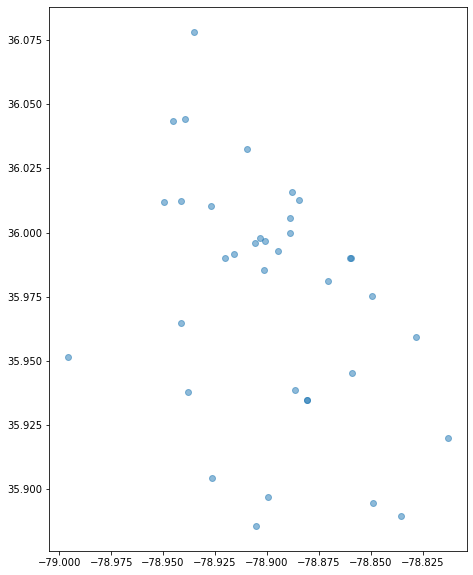

In [1207]:
#Plot the dpd_w_policebeats data
fig, ax = plt.subplots(figsize = (10,10))
dpd_w_policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

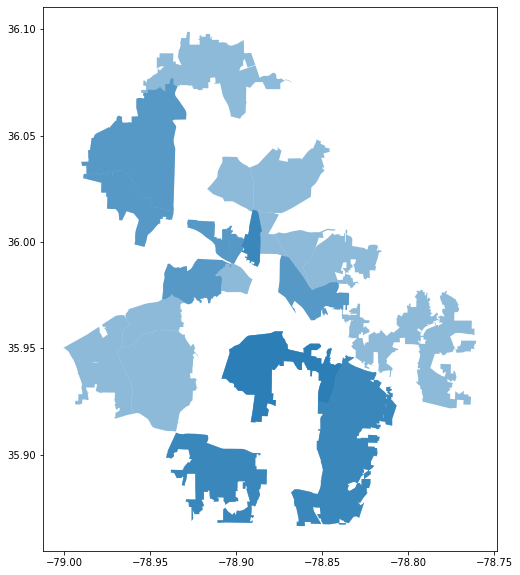

In [1208]:
#Plot the policebeats_w_dpd data
fig, ax = plt.subplots(figsize = (10,10))
policebeats_w_dpd.plot(ax = ax, alpha = 0.5)
plt.show()

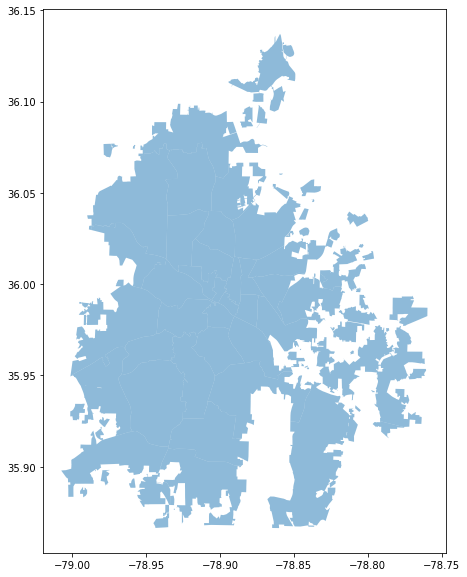

In [1209]:
# Plot the beat data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

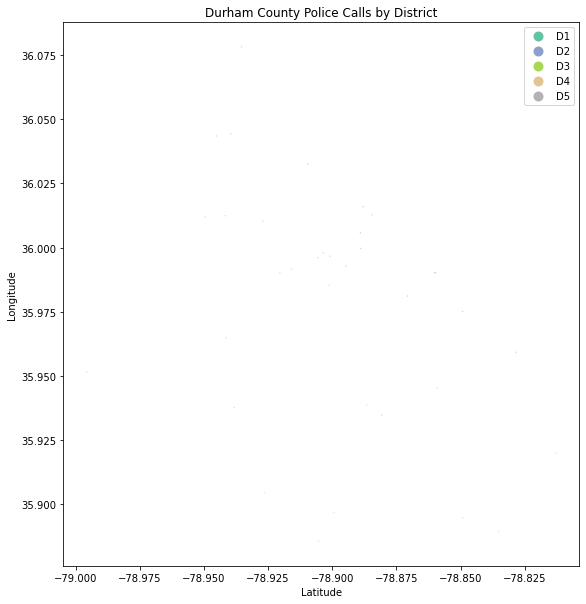

In [1210]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

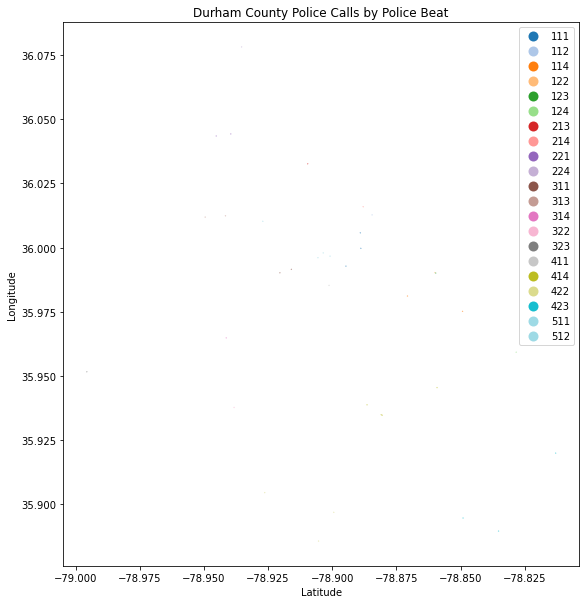

In [1211]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

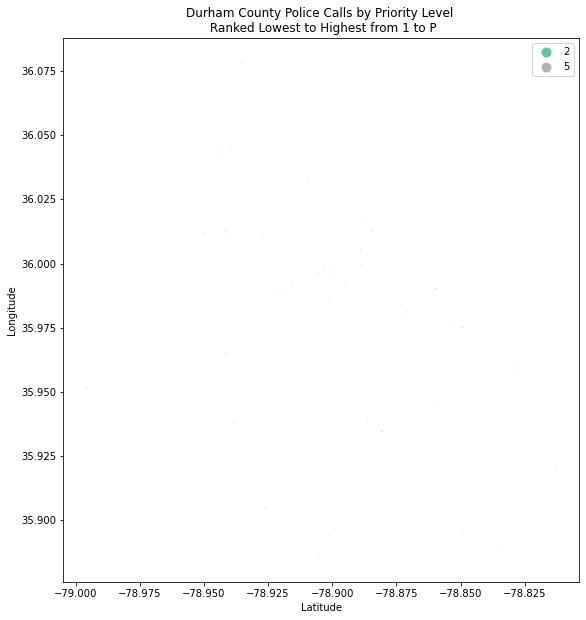

In [1212]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

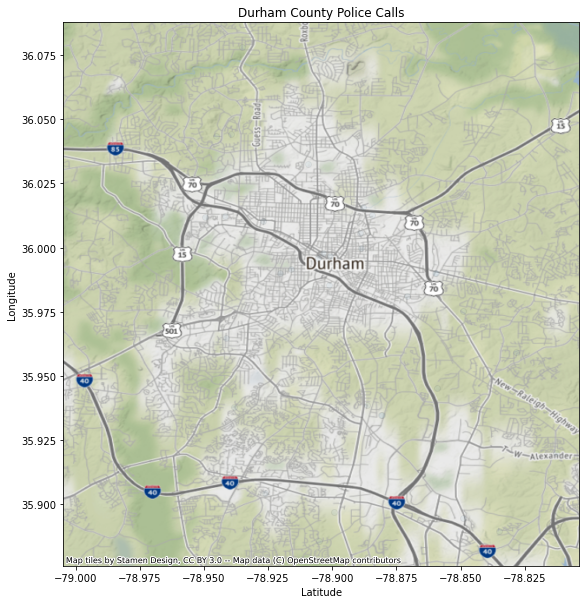

In [1213]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

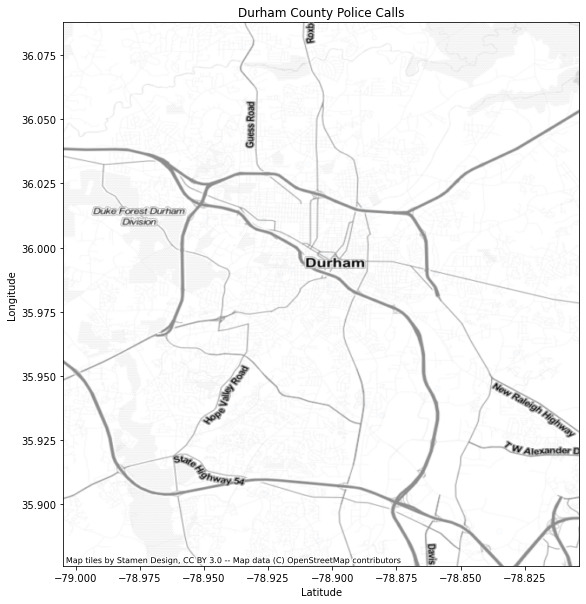

In [1214]:
#Adding a base map to the caller data with labels
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.01, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

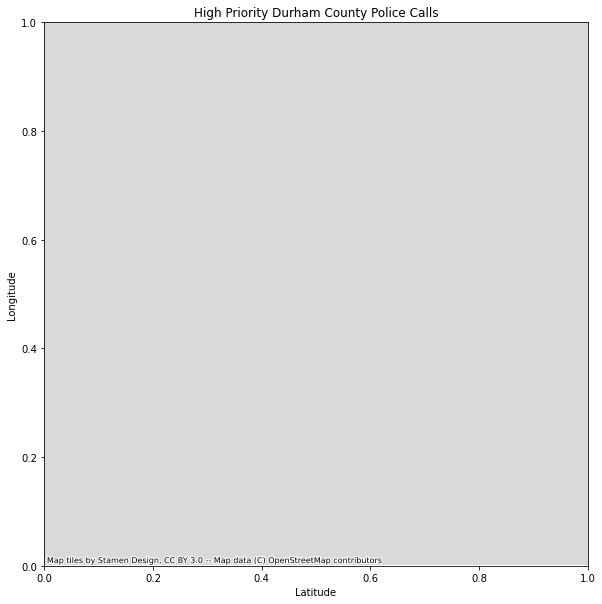

In [1215]:
#Mapping high priority calls over a street map
PriorityCalls = dpd_w_policebeats.loc[dpd_w_policebeats['Priority'] == 'P']

ax = PriorityCalls.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='High Priority Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

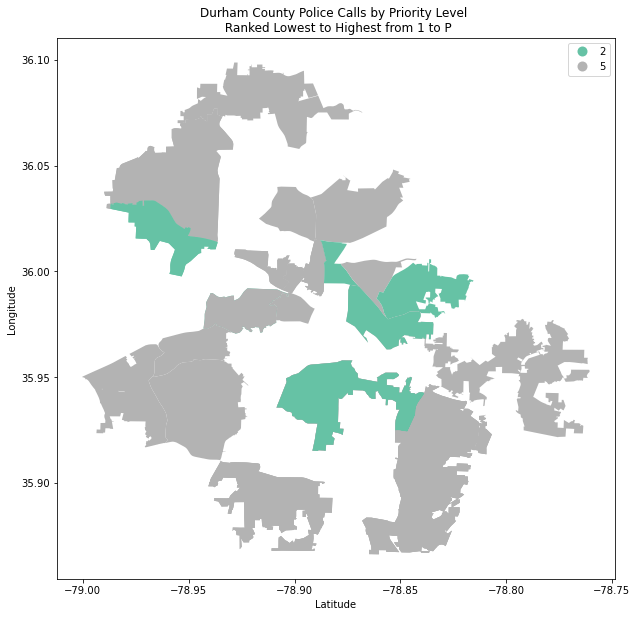

In [1216]:
#Plotting the policebeats_w_dpd data by priority level
fig, ax = plt.subplots(figsize = (10,10))

policebeats_w_dpd.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

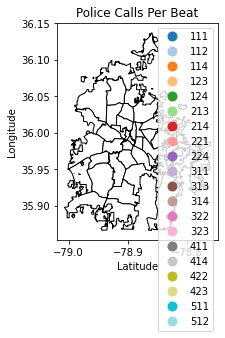

In [1217]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

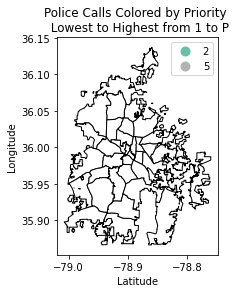

In [1218]:
#Plot the two data sets together setting the aspect 'equal' by priority
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Priority', categorical=True, legend=True, marker='o', cmap='Set2', markersize=0.001)

ax.set(title='Police Calls Colored by Priority \n Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

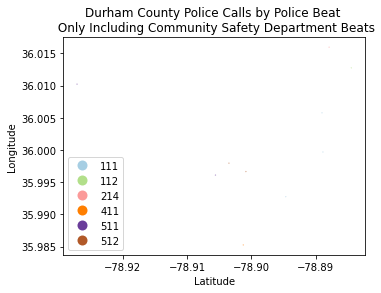

In [1219]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1220]:
#Count the calls in each beat
dpd_w_policebeats.groupby("Beat")["Beat"].count()

Beat
111    3
112    1
114    2
123    2
124    1
213    1
214    1
221    2
224    1
311    2
313    2
314    1
322    1
323    1
411    1
414    4
422    3
423    3
511    2
512    2
Name: Beat, dtype: int64

In [1221]:
#Find the beat with highest proportion of priority calls
#Create filtered call data with only P calls
Pcalls = dpdcalls.loc[(dpdcalls["Priority"] == "P")].copy()

In [1222]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

Beat  calls_count
0  111            3
1  112            1
2  114            2
3  123            2
4  124            1

In [1223]:
#Grouping priority calls by beat
#Creating new data frame called onlypcalls
onlypcalls = Pcalls.groupby(['Beat']).size().to_frame(name = 'pcalls_count').reset_index()
onlypcalls.head()

Empty DataFrame
Columns: [Beat, pcalls_count]
Index: []

In [1224]:
#Add a proportions column to combcalls
combcalls = pd.merge(allcalls, onlypcalls, on ='Beat')

combcalls['prop_of_pcalls']= combcalls['pcalls_count'] / combcalls['calls_count']

combcalls.sort_values(by='prop_of_pcalls', inplace=True, ascending=False)

combcalls.head()

Empty DataFrame
Columns: [Beat, calls_count, pcalls_count, prop_of_pcalls]
Index: []

In [1225]:
#Copy policebeats and rename column LAWBEAT
policebeats2 = policebeats.copy()

policebeats2.rename(columns=({'LAWBEAT':'Beat'}), inplace=True)

In [1226]:
#Change Beat column to a string in policebeats2 data set
policebeats2["Beat"] = policebeats2["Beat"].map(lambda g: str(int(g+0.1)))

In [1227]:
#Merge policebeats_w_dpd with combcalls
#Label merged data as combcalls_merge
combcalls_merge = pd.merge(combcalls, policebeats2, on ='Beat')

combcalls_merge.head(3)

Empty DataFrame
Columns: [calls_count, pcalls_count, prop_of_pcalls, OBJECTID, PERIMETER, STATUS, CONTIGUOUS, LAWDIST, Beat, CAD, GIS_DataA1, ShapeSTAre, ShapeSTLen, geometry]
Index: []

In [1228]:
#Merged the caller data with combcalls by changing the index
combcalls_merge = policebeats2.set_index('Beat').join(combcalls.set_index('Beat'))

combcalls_merge.head(3)

OBJECTID      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1  \
Beat                                                                      
224         12   94210.453125      I         no      D2  224       None   
224         13  116621.601562      I        yes      D2  224       None   
224         14   12884.019531      I         no      D2  224       None   

        ShapeSTAre     ShapeSTLen  \
Beat                                
224   7.014559e+07   94210.453140   
224   1.449941e+08  116621.571622   
224   4.966974e+06   12884.022638   

                                               geometry  calls_count  \
Beat                                                                   
224   POLYGON ((-78.86340 36.13179, -78.86340 36.131...          NaN   
224   POLYGON ((-78.91393 36.09660, -78.91391 36.096...          NaN   
224   POLYGON ((-78.87366 36.09793, -78.87363 36.097...          NaN   

      pcalls_count  prop_of_pcalls  
Beat                                
224            NaN             NaN  
224            NaN             NaN  
224            NaN             NaN

In [1229]:
#Show merged data info
combcalls_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 83 entries, 224 to 422
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        83 non-null     int64   
 1   PERIMETER       83 non-null     float64 
 2   STATUS          83 non-null     object  
 3   CONTIGUOUS      83 non-null     object  
 4   LAWDIST         83 non-null     object  
 5   CAD             83 non-null     object  
 6   GIS_DataA1      0 non-null      object  
 7   ShapeSTAre      83 non-null     float64 
 8   ShapeSTLen      83 non-null     float64 
 9   geometry        83 non-null     geometry
 10  calls_count     0 non-null      float64 
 11  pcalls_count    0 non-null      float64 
 12  prop_of_pcalls  0 non-null      float64 
dtypes: float64(6), geometry(1), int64(1), object(5)
memory usage: 9.1+ KB


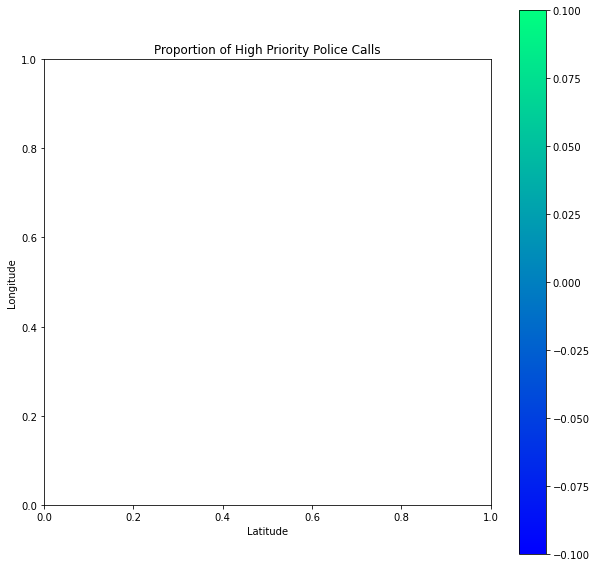

In [1230]:
#Plot chloropleth map of proportion of high priority calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='prop_of_pcalls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

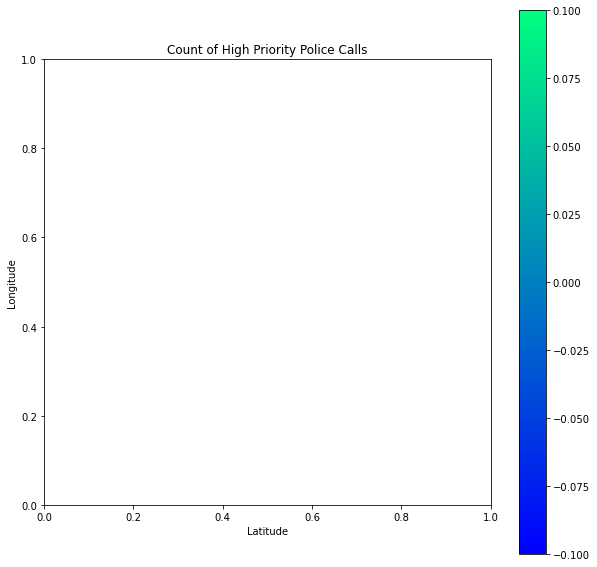

In [1231]:
#Plot chloropleth map of number of high priority calls
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='pcalls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Count of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1232]:
#Find the beat with highest proportion of priority levels 2-6
#Create filtered call data with only 2-6 calls
twotosix = ['2', '3', '4', '5', '6']

twosixcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)]

twosixcalls.head()

Event Numb Case Numbe  Call Date   Call Time   Source Priority  \
6166     21008711       None   1/8/2021   8:29:50AM  {Other}        5   
6265     21008846       None   1/8/2021  10:51:13AM  {Other}        5   
9693     21013604       None  1/12/2021   1:28:35PM  {Other}        5   
19119    21026535       None  1/22/2021   8:01:41PM    E-911        2   
22548    21031341       None  1/27/2021   4:16:05AM  {Other}        5   

        Nature             Address        X       Y District Beat  \
6166   HANG UP      5000 NC 55 HWY  2029784  781361       D4  422   
6265   HANG UP   4600 S MIAMI BLVD  2044713  780583       D4  423   
9693   HANG UP  500 W PETTIGREW ST  2027930  817494       D5  511   
19119  HANG UP   1000 MORELAND AVE  2023544  815351       D3  311   
22548  HANG UP    2300 HOLLOWAY ST  2041396  815391       D1  123   

                    Dispositio  Cancelled                    geometry  
6166                 Unfounded          0  POINT (-78.89944 35.89684)  
6265   Resolved Without Report          0  POINT (-78.84903 35.89465)  
9693   Resolved Without Report          0  POINT (-78.90558 35.99611)  
19119  Resolved Without Report          0  POINT (-78.92041 35.99023)  
22548                Unfounded          0  POINT (-78.86007 35.99028)

In [1233]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

Beat  calls_count
0  111            3
1  112            1
2  114            2
3  123            2
4  124            1

In [1234]:
#Grouping 2-6 calls by beat
#Creating new data frame called onlytwosix
onlytwosix = twosixcalls.groupby(['Beat']).size().to_frame(name = '2_to_6_calls_count').reset_index()
onlytwosix.head()

Beat  2_to_6_calls_count
0  111                   3
1  112                   1
2  114                   2
3  123                   2
4  124                   1

In [1235]:
#Add a proportions column to combcalls
combcalls2 = pd.merge(allcalls, onlytwosix, on ='Beat')

combcalls2['prop_of_2_6_calls']= combcalls2['2_to_6_calls_count'] / combcalls2['calls_count']

combcalls2.sort_values(by='prop_of_2_6_calls', inplace=True, ascending=False)

combcalls2.head()

Beat  calls_count  2_to_6_calls_count  prop_of_2_6_calls
0   111            3                   3                1.0
1   112            1                   1                1.0
18  511            2                   2                1.0
17  423            3                   3                1.0
16  422            3                   3                1.0

In [1236]:
#Merge policebeats data with combcalls2
#Label merged data as combcalls2_merge
combcalls2_merge = pd.merge(combcalls2, policebeats2, on ='Beat')

combcalls2_merge.head(3)

Beat  calls_count  2_to_6_calls_count  prop_of_2_6_calls  OBJECTID  \
0  111            3                   3                1.0        50   
1  112            1                   1                1.0        51   
2  511            2                   2                1.0        53   

      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  32615.019531      I        yes      D5  511       None  2.129644e+07   

     ShapeSTLen                                           geometry  
0  28608.799743  POLYGON ((-78.89039 36.01517, -78.89038 36.015...  
1  26265.852604  POLYGON ((-78.88787 36.01473, -78.88734 36.014...  
2  32615.017763  POLYGON ((-78.92318 36.01031, -78.92260 36.010...

In [1237]:
#Merged the data with combcalls by changing the index
combcalls2_merge = policebeats2.set_index('Beat').join(combcalls2.set_index('Beat'))

combcalls2_merge.head(3)

OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1  \
Beat                                                                     
111         50  28608.800781      I        yes      D1  111       None   
112         51  26265.849609      I        yes      D1  112       None   
113         62  20667.539062      I        yes      D1  113       None   

        ShapeSTAre    ShapeSTLen  \
Beat                               
111   2.010252e+07  28608.799743   
112   2.079934e+07  26265.852604   
113   2.159195e+07  20667.538873   

                                               geometry  calls_count  \
Beat                                                                   
111   POLYGON ((-78.89039 36.01517, -78.89038 36.015...          3.0   
112   POLYGON ((-78.88787 36.01473, -78.88734 36.014...          1.0   
113   POLYGON ((-78.87372 35.99369, -78.87458 35.991...          NaN   

      2_to_6_calls_count  prop_of_2_6_calls  
Beat                                         
111                  3.0                1.0  
112                  1.0                1.0  
113                  NaN                NaN

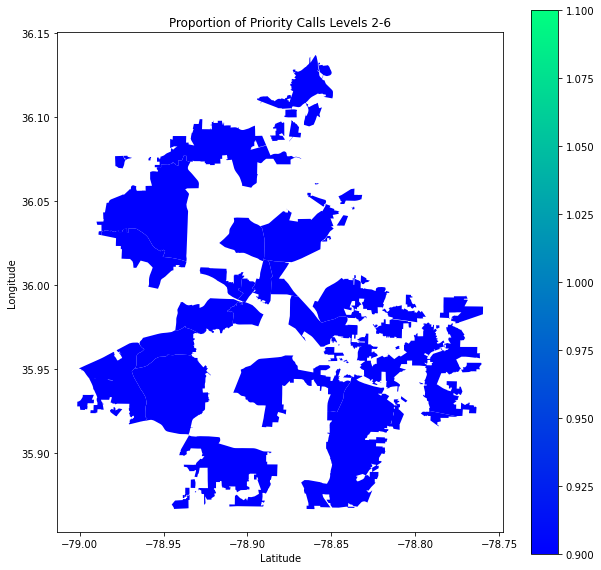

In [1238]:
#Plot chloropleth map of proportion of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='prop_of_2_6_calls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

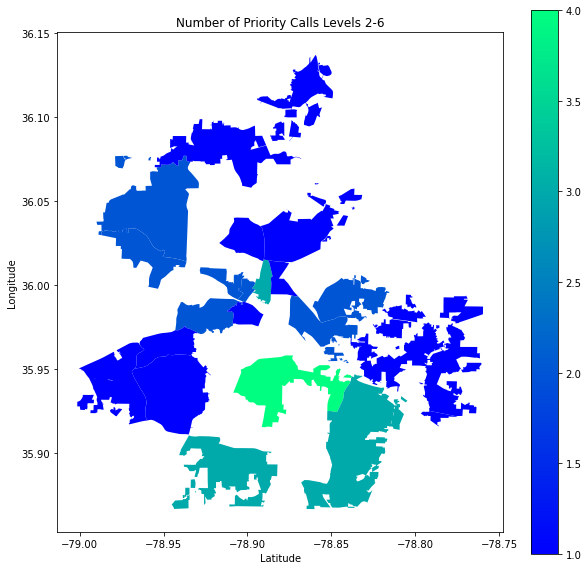

In [1239]:
#Plot chloropleth map of number of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='2_to_6_calls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Number of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1240]:
#Interactive map for the number of priority level calls 2 to 6
combcalls2_map = combcalls2_merge.explore(
     column="2_to_6_calls_count", 
     tooltip="2_to_6_calls_count", 
     popup=True,
     tiles="CartoDB positron",
     cmap="Set1", 
     style_kwds=dict(color="black") 
    )

combcalls2_map.save("heat_map.html")

In [1241]:
#Interactive map for total call count
combcalls2_merge.explore(
     column="calls_count", 
     tooltip="calls_count", 
     popup=True, 
     tiles="CartoDB positron", 
     cmap="Paired", 
     style_kwds=dict(color="black")
    )

In [1242]:
##Census Data Analysis
#Load in census data for North Carolina
ncblockmap = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')
ncblockmap.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        37        037    020203      2037  370370202032037  Block 2037   
1        37        105    030401      1015  371050304011015  Block 1015   
2        37        183    053615      2052  371830536152052  Block 2052   
3        37        035    011501      2036  370350115012036  Block 2036   
4        37        037    020201      2003  370370202012003  Block 2003   

  MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0   G5040    R   None     None          S  2401181      1879  +35.7514163   
1   G5040    R   None     None          S   537166      1888  +35.4895705   
2   G5040    R   None     None          S        0     10154  +35.8791781   
3   G5040    R   None     None          S  2009262      7616  +35.5829239   
4   G5040    R   None     None          S  1557161     14689  +35.8325256   

     INTPTLON20                                           geometry  
0  -079.2909223  POLYGON ((-79.29947 35.75562, -79.29942 35.756...  
1  -079.1541245  POLYGON ((-79.16050 35.48907, -79.15995 35.489...  
2  -078.8085709  POLYGON ((-78.80964 35.87904, -78.80962 35.879...  
3  -081.0441821  POLYGON ((-81.05569 35.58896, -81.05537 35.589...  
4  -079.3723536  POLYGON ((-79.37919 35.83136, -79.37905 35.831...

In [1243]:
#Set the crs for the census data
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [1244]:
#Load in race data from census bureau
#Change id variable to GEOID20
racedata = pd.read_csv('/Users/sadiesheridan/Downloads/Race data/DECENNIALPL2020.P1_data_with_overlays_2022-06-06T132656.csv', skiprows = 1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  ...  \
0                                            6  ...   
1                                            7  ...   
2                                            4  ...   
3                                            0  ...   
4                                            1  ...   

    !!Total:!!Population of two or more races:!!Population of five races:  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

    !!Total:!!Population of two or more races:!!Population of five r

In [1245]:
#Filter the block map to only include Durham blocks (63)
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4402, 83)

In [1246]:
#Merge the Durham block data with the race data
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  ...  MTFCC20  UR20  UACE20  \
0                                            6  ...    G5040     R    None   
1                                            7  ...    G5040     R    None   
2                                            4  ...    G5040     R    None   
3                                            0  ...    G5040     R    None   
4                                            1  ...    G5040     R    None   

   UATYPE20  FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20    INTPTLON20  \
0      None           S   655575         0  +36.0194814  -078.8821382   
1      None           S    23209         0  +36.0205516  -078.8893121   
2      None           S    17466         0  +36.0205916  -078.8869754   
3      None           S    22809         0  +36.0205318  -078.8880959   
4      None           S    2

In [1247]:
#Make index GEOID20
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20      NAME20 MTFCC20  \
GEOID20                                                                        
370630018064007        37        063    001806      4007  Block 4007   G5040   
370630018017028        37        063    001801      7028  Block 7028   G5040   
370630021004022        37        063    002100      4022  Block 4022   G5040   

                UR20 UACE20 UATYPE20 FUNCSTAT20  ...  \
GEOID20                                          ...   
370630018064007    R   None     None          S  ...   
370630018017028    R   None     None          S  ...   
370630021004022    R   None     None          S  ...   

                  !!Total:!!Population of two or more races:!!Population of four races:!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race  \
GEOID20                                                                                                                                                                                          
370630018064007                                                  0                                                                                                                               
370630018017028                                                  0                                                                                                                               
370630021004022                                                  0                                                                                                                               

                  !!Total:!!Population of two or more races:!!Population of five races:  \
GEOID20                                                                                   
370630018064007                                                  0                        
370630018017028                                                  0                        
370630021004022                                                  0                        

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander  \
GEOID20                                                                                                                                                                                                          
370630018064007                                                  0                                                                                                                                               
370630018017028                                                  0                                                                                                                                               
370630021004022                                                  0                                                                                                                                               

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race  \
GEOID20                                                                                                                                                                               
370630018064007                                                  0                                                                                                                    
370630018017028                                                  0                                                                                                                    
370630021004022                                                  0                                                          

In [1248]:
#Check the geometry of the merged data
durhamracemap.geometry

GEOID20
370630018064007    POLYGON ((-78.82464 36.01317, -78.82456 36.013...
370630018017028    POLYGON ((-78.80507 36.06321, -78.80467 36.063...
370630021004022    POLYGON ((-78.83005 36.15072, -78.83001 36.150...
370630020362000    POLYGON ((-78.91718 35.90556, -78.91702 35.905...
370630018017041    POLYGON ((-78.83393 36.05431, -78.83343 36.055...
                                         ...                        
370630022002048    POLYGON ((-78.89882 35.99520, -78.89875 35.995...
370630022001012    POLYGON ((-78.90950 36.00137, -78.90934 36.001...
370630007003016    POLYGON ((-78.92578 35.97207, -78.92571 35.972...
370630020262014    POLYGON ((-78.89767 35.94758, -78.89762 35.947...
370630013011001    POLYGON ((-78.89541 35.98186, -78.89538 35.981...
Name: geometry, Length: 4401, dtype: geometry

In [1249]:
#Change the column names
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

warnings.filterwarnings('ignore')

In [1250]:
#Find the proportion of specific races compared to the total population
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']

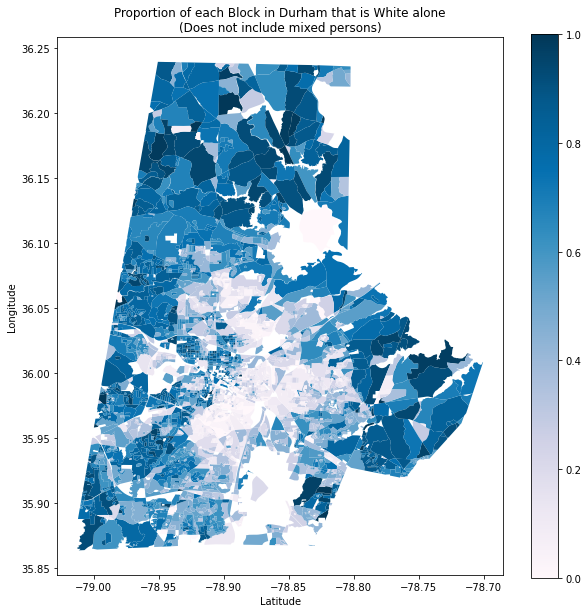

In [1251]:
#Plot chloropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

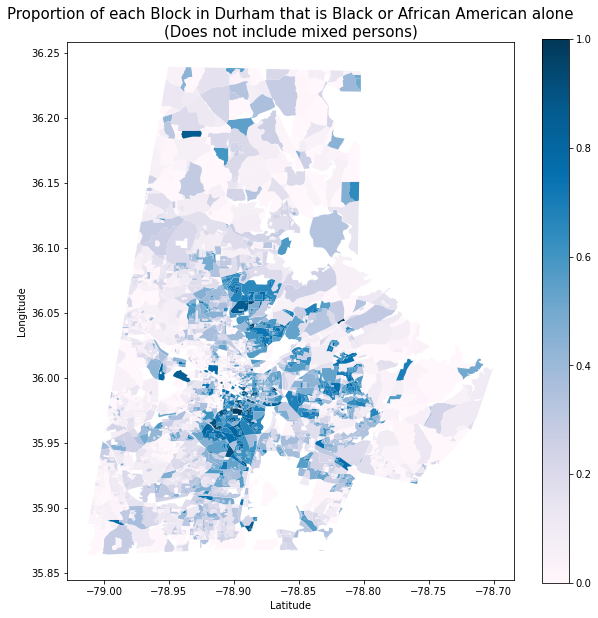

In [1252]:
#Plot chloropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1253]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])

warnings.filterwarnings('ignore')

In [1254]:
#Look at the first five rows of cblockDurhamBeats
cblockDurhamBeats.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
88         37        063    002036      2000  370630020362000  Block 2000   
328        37        063    002020      1013  370630020201013  Block 1013   
338        37        063    001712      2001  370630017122001  Block 2001   
491        37        063    001708      4002  370630017084002  Block 4002   
536        37        063    001801      1025  370630018011025  Block 1025   

    MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
88    G5040    R   None     None          S   286743      3982  +35.9051346   
328   G5040    R   None     None          S    96212      4557  +35.8938510   
338   G5040    R   None     None          S  1274264     49745  +36.0548720   
491   G5040    R   None     None          S   363083      3607  +36.0776513   
536   G5040    R   None     None          S   107654      7350  +36.0128630   

       INTPTLON20                                           geometry  Beat  
88   -078.9104302  POLYGON ((-78.91718 35.90556, -78.91702 35.905...   421  
328  -078.9448088  POLYGON ((-78.94746 35.89382, -78.94727 35.893...   324  
338  -078.9454010  POLYGON ((-78.95554 36.05137, -78.95553 36.051...   221  
491  -078.8796988  POLYGON ((-78.88862 36.07515, -78.88839 36.075...   224  
536  -078.8662020  POLYGON ((-78.86911 36.01263, -78.86898 36.012...   121

In [1255]:
#Make index GEOID20
durhamracebeat = cblockDurhamBeats.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracebeat.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20      NAME20 MTFCC20  \
GEOID20                                                                        
370630020362000        37        063    002036      2000  Block 2000   G5040   
370630020201013        37        063    002020      1013  Block 1013   G5040   
370630017122001        37        063    001712      2001  Block 2001   G5040   

                UR20 UACE20 UATYPE20 FUNCSTAT20  ...  \
GEOID20                                          ...   
370630020362000    R   None     None          S  ...   
370630020201013    R   None     None          S  ...   
370630017122001    R   None     None          S  ...   

                  !!Total:!!Population of two or more races:!!Population of four races:!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race  \
GEOID20                                                                                                                                                                                          
370630020362000                                                  0                                                                                                                               
370630020201013                                                  0                                                                                                                               
370630017122001                                                  0                                                                                                                               

                  !!Total:!!Population of two or more races:!!Population of five races:  \
GEOID20                                                                                   
370630020362000                                                  0                        
370630020201013                                                  0                        
370630017122001                                                  0                        

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander  \
GEOID20                                                                                                                                                                                                          
370630020362000                                                  0                                                                                                                                               
370630020201013                                                  0                                                                                                                                               
370630017122001                                                  0                                                                                                                                               

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race  \
GEOID20                                                                                                                                                                               
370630020362000                                                  0                                                                                                                    
370630020201013                                                  0                                                                                                                    
370630017122001                                                  0                                                          

In [1256]:
#Change the column names
durhamracebeat.columns = durhamracebeat.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracebeat.columns = durhamracebeat.columns.str.replace('[#,@,&,!]', '')
durhamracebeat.columns = durhamracebeat.columns.str.replace('[:]', '_')
durhamracebeat.head()

warnings.filterwarnings('ignore')

In [1257]:
#Find the proportion of specific races compared to the total population
durhamracebeat['propwhite']= durhamracebeat['total_population_of_one_race_white_alone'] / durhamracebeat['total_']
durhamracebeat['propblack']= durhamracebeat['total_population_of_one_race_black_or_african_american_alone'] / durhamracebeat['total_']

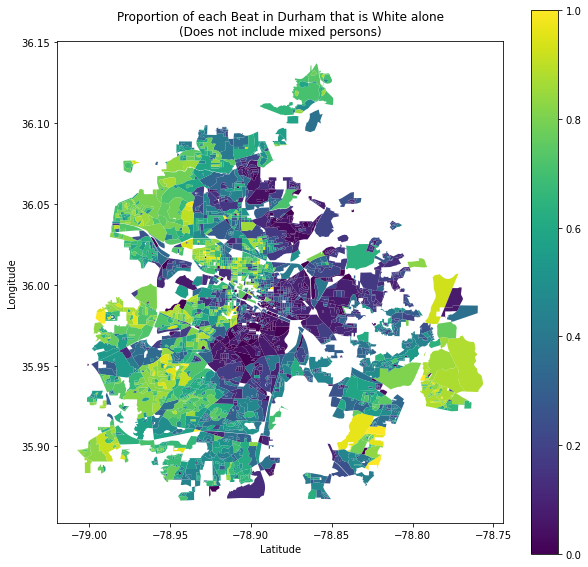

In [1258]:
#Plot chloropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracebeat.plot(column='propwhite',
                                legend=True,
                                cmap="viridis", ax=ax, aspect=1);

plt.title("Proportion of each Beat in Durham that is White alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

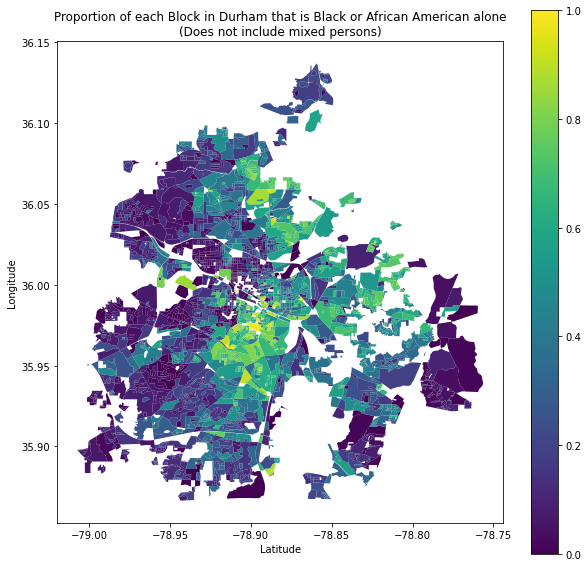

In [1259]:
#Plot chloropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracebeat.plot(column='propblack',
                                legend=True,
                                cmap="viridis", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1260]:
#Merging race data into the police beat and block data
beatswithrace = pd.merge(racedata, cblockDurhamBeats, on ='GEOID20')
beatswithrace.head(3)

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           

    !!Total:!!Population of two or more races:  ...  UR20  UACE20  UATYPE20  \
0                                            6  ...     R    None      None   
1                                            7  ...     R    None      None   
2                                            4  ...     R    None      None   

   FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20    INTPTLON20  \
0           S   655575         0  +36.0194814  -078.8821382   
1           S    23209         0  +36.0205516  -078.8893121   
2           S    17466         0  +36.0205916  -078.8869754   

                                            geometry  Beat  
0  POLYGON ((-78.88998 36.01852, -78.88995 36.019...   214  
1  POLYGON ((-78.88993 36.02006, -78.88990 36.021...   214  
2  POLYGON ((-78.88749 36.02015, -78.88746 36.021...   214  

[3 rows x 89 columns]

In [1261]:
#Grouping the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head()

Beat   !!Total:   !!Total:!!Population of one race:  \
0   111       3949                                3539   
1   112       3083                                2860   
2   113       4094                                3876   
3   114       5631                                5214   
4   121       8025                                7501   

    !!Total:!!Population of one race:!!White alone  \
0                                             1242   
1                                              454   
2                                              891   
3                                              741   
4                                             1485   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                               1487                     
1                                               1276                     
2                                               2046                     
3                                               2981                     
4                                               4619                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                 91                             
1                                                 95                             
2                                                 66                             
3                                                 96                             
4                                                 88                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                               73   
1                                               18   
2                                               84   
3                                               61   
4                                               74   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  3                                      
1                                                  1                                      
2                                                  1                                      
3                                                  1                                      
4                                                  4                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                643           
1                                               1016           
2                                                788           
3                                               1334           
4                                               1231           

    !!Total:!!Population of two or more races:  ...  \
0                                          410  ...   
1                                          223  ...   
2                                          218  ...   
3                                          417  ...   
4                                          524  ...   

    !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander  \
0                                                  0                                                                                                                                                
1                                                  0                                                                                                                                                
2                                                  0                                                                                                                                                
3              

In [1262]:
#Adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat.head(3)

Beat   !!Total:   !!Total:!!Population of one race:  \
0   111       3949                                3539   
1   112       3083                                2860   
2   113       4094                                3876   

    !!Total:!!Population of one race:!!White alone  \
0                                             1242   
1                                              454   
2                                              891   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                               1487                     
1                                               1276                     
2                                               2046                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                 91                             
1                                                 95                             
2                                                 66                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                               73   
1                                               18   
2                                               84   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  3                                      
1                                                  1                                      
2                                                  1                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                643           
1                                               1016           
2                                                788           

    !!Total:!!Population of two or more races:  ...     PERIMETER  STATUS  \
0                                          410  ...  28608.800781       I   
1                                          223  ...  26265.849609       I   
2                                          218  ...  20667.539062       I   

   CONTIGUOUS  LAWDIST  LAWBEAT  CAD  GIS_DataA1    ShapeSTAre    ShapeSTLen  \
0         yes       D1      111  111        None  2.010252e+07  28608.799743   
1         yes       D1      112  112        None  2.079934e+07  26265.852604   
2         yes       D1      113  113        None  2.159195e+07  20667.538873   

                                            geometry  
0  POLYGON ((-78.89039 36.01517, -78.89038 36.015...  
1  POLYGON ((-78.88787 36.01473, -78.88734 36.014...  
2  POLYGON ((-78.87372 35.99369, -78.87458 35.991...  

[3 rows x 85 columns]

In [1263]:
#Setting the beat as the index
raceineachbeat = popsumbybeat.set_index('Beat').join(policebeats.set_index('LAWBEAT'))
raceineachbeat.head(3)

!!Total:   !!Total:!!Population of one race:  \
111       3949                                3539   
112       3083                                2860   
113       4094                                3876   

      !!Total:!!Population of one race:!!White alone  \
111                                             1242   
112                                              454   
113                                              891   

      !!Total:!!Population of one race:!!Black or African American alone  \
111                                               1487                     
112                                               1276                     
113                                               2046                     

      !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
111                                                 91                             
112                                                 95                             
113                                                 66                             

      !!Total:!!Population of one race:!!Asian alone  \
111                                               73   
112                                               18   
113                                               84   

      !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
111                                                  3                                      
112                                                  1                                      
113                                                  1                                      

      !!Total:!!Population of one race:!!Some Other Race alone  \
111                                                643           
112                                               1016           
113                                                788           

      !!Total:!!Population of two or more races:  \
111                                          410   
112                                          223   
113                                          218   

      !!Total:!!Population of two or more races:!!Population of two races:  \
111                                                384                       
112                                                202                       
113                                                194                       

     ...  OBJECTID     PERIMETER  STATUS  CONTIGUOUS  LAWDIST  CAD  \
111  ...        50  28608.800781       I         yes       D1  111   
112  ...        51  26265.849609       I         yes       D1  112   
113  ...        62  20667.539062       I         yes       D1  113   

     GIS_DataA1    ShapeSTAre    ShapeSTLen  \
111        None  2.010252e+07  28608.799743   
112        None  2.079934e+07  26265.852604   
113        None  2.159195e+07  20667.538873   

                                              geometry  
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...  
112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...  
113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...  

[3 rows x 83 columns]

In [1264]:
#Seeing how many blocks there are per beat
blocksperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'block_count').reset_index()
meanblocksperbeat = blocksperbeat[["block_count"]].mean()
meanblocksperbeat

block_count    94.428571
dtype: float64